In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
div.CodeMirror, div.CodeMirror pre, div.CodeMirror-code,
div.output_area pre, div.output_wrapper pre,
.text_cell_render, .text_cell_render *
{ font-family: Consolas; font-size: 15pt; line-height: 140%;}
</style>"""))

# 파일 이름에서 '이름'을 자신의 이름으로 고치시오.
# 제출 후 이 파일을 삭제하세요.

# 문제1 

아래 사이트에서 문제를 풀고 코드를 붙여넣기 하시오.

https://www.acmicpc.net/problem/1753

[문제]
- 방향그래프가 주어지면 주어진 시작점에서 다른 모든 정점으로의 최단 경로를 구하는 프로그램을 작성하시오. 단, 모든 간선의 가중치는 10 이하의 자연수이다.

[입력]
- 첫째 줄에 정점의 개수 V와 간선의 개수 E가 주어진다. (1 ≤ V ≤ 20,000, 1 ≤ E ≤ 300,000) 모든 정점에는 1부터 V까지 번호가 매겨져 있다고 가정한다. 둘째 줄에는 시작 정점의 번호 K(1 ≤ K ≤ V)가 주어진다. 셋째 줄부터 E개의 줄에 걸쳐 각 간선을 나타내는 세 개의 정수 (u, v, w)가 순서대로 주어진다. 이는 u에서 v로 가는 가중치 w인 간선이 존재한다는 뜻이다. u와 v는 서로 다르며 w는 10 이하의 자연수이다. 서로 다른 두 정점 사이에 여러 개의 간선이 존재할 수도 있음에 유의한다.

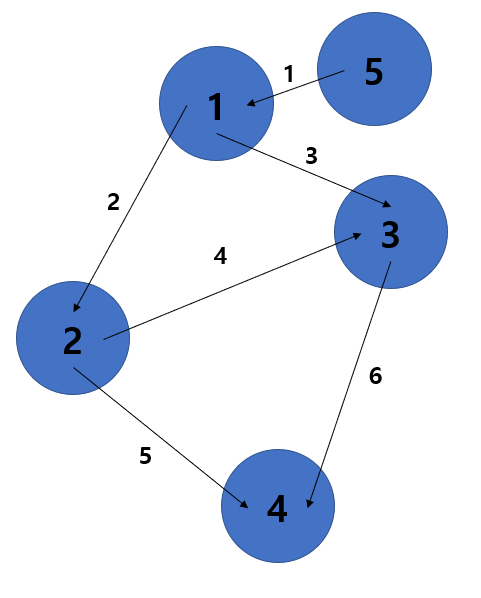

[출력]
- 첫째 줄부터 V개의 줄에 걸쳐, i번째 줄에 i번 정점으로의 최단 경로의 경로값을 출력한다. 시작점 자신은 0으로 출력하고, 경로가 존재하지 않는 경우에는 INF를 출력하면 된다.


***실행결과***
```
0
2
3
7
INF
```


In [7]:
from io import StringIO
# 아래는 수정하지 마시오.
input_str = \
"""
5 6
1
5 1 1
1 2 2
1 3 3
2 3 4
2 4 5
3 4 6
"""
stream = StringIO(input_str.strip())
input = stream.readline

# 아래에 코드를 작성하시오.
import sys
import heapq
input = sys.stdin.readline
INF = 1e9 # 무한을 의미하는 값으로 10억을 설정

def dijkstra(graph, start):
    d = {k:INF for k in graph} # 거리 테이블
    #v = {k:False for k in graph} # 처리(방문) 표시
    d[start] = 0
    
    q = [] # 최소힙 저장 변수
    # 시작 노드로 가기 위한 최단 거리는 0으로 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start))
    
    while q: # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        # cur_node: 현재 방문처리 중인 노드, cur_cost: 시작노드에서 cur_node까지 비용
        cur_cost, cur_node = heapq.heappop(q) 
        
        # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
#        if v[cur_node]:
#            continue
#        v[cur_node] = True # 현재노드 방문 처리

        # d 테이블과 비교하여 불필요한(더 비용이 큰) 경로의 경우에는 무시
        if d[cur_node] < cur_cost:
            continue
        
        # 현재 노드와 연결된 다른 인접한 노드들을 확인
        # adj_node: 인접노드, weight: 두 노드(cur_node와 adj_node) 사이의 웨이트
        for adj_node, weight in graph[cur_node]: 
            new_cost = cur_cost + weight
            # 현재 노드를 거쳐서 인접 노드로 이동하는 비용이, 지금까지 알려진 비용보다 더 작은 경우
            if new_cost < d[adj_node]:
                d[adj_node] = new_cost
                heapq.heappush(q, (new_cost, adj_node))
    return d


V, E = map(int, input().split())
start = int(input())
g = {k:[] for k in range(1, V+1)} # 그래프

for _ in range(E):
    u, v, w = map(int, input().split())
    g[u].append((v, w)) # 인접리스트 만들기
    
d = dijkstra(g, start)

for i in range(1, V+1):
    print(d[i] if d[i] != INF else "INF")

ValueError: not enough values to unpack (expected 2, got 0)

In [3]:
# 위 문제 각주 제거 버전
import sys
import heapq
input = sys.stdin.readline
INF = 1e9

def dijkstra(graph, start):
    d = {k:INF for k in graph}
    d[start] = 0
    
    q = []
    heapq.heappush(q, (0,start))
    
    while q:
        cur_cost, cur_node = heapq.heappop(q)
        
        if d[cur_node] < cur_cost:
            continue
            
        for adj_node, weight in graph[cur_node]:
            new_cost = cur_cost + weight
            
            if new_cost < d[adj_node]:
                d[adj_node] = new_cost
                heapq.heappush(q, (new_cost, adj_node))
                
    return d

V, E = map(int, input().split())
start = int(input())
g = {k:[] for k in range(1, V+1)}

for _ in range(E):
    u, v, w = map(int, input().split())
    g[u].append((v,w))
    
d = dijkstra(g, start)

for i in range(1, V+1):
    print(d[i] if d[i] != INF else "INF")

ValueError: not enough values to unpack (expected 2, got 0)

# ppt 문제
힙 라이브러리 사용 예제 : 최소힙

In [2]:
import heapq

# 오름차순 힙 정렬
def heapsort(iterable):
    h = []
    result = []
    # 모든 원소를 차례대로 힙에 삽입
    for value in iterable:
        heapq.heappush(h, value)
    # 힙에 삽입딘 모든 원소를 차례대로 꺼내어 담기
    for i in range(len(h)):
        result.append(heapq.heappop(h))
    return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import sys
import heapq
input = sys.stdin.readline
INF = 1e9

def dijkstra(graph, start):
    d = {k:INF for k in graph}
    d[start] = 0
    
    q = []
    heapq.heappush(q, (0,start))
    
    while q:
        cur_cost, cur_node = heapq.heappop(q)
        
        if d[cur_node] < cur_cost:
            continue
            
        for adj_node, weight in graph[cur_node]:
            new_cost = cur_cost + weight
            
            if new_cost < d[adj_node]:
                d[adj_node] = new_cost
                heapq.heappush(q, (new_cost, adj_node))
                
    return d

V, E = map(int, input().split())
start = int(input())
g = {k:[] for k in range(1, V+1)}

for _ in range(E):
    u, v, w = map(int, input().split())
    g[u].append((v,w))
    
d = dijkstra(g, start)

for i in range(1, V+1):
    print(d[i] if d[i] != INF else "INF")
/ 

import heapq

def heapsort(iterable):
    h = []
    result = []

    for value in iterable:
        heapq.heappush(h, value)

    for i in range(len(h)):
        result.append(heapq.heappop(h))
    return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)
/
def counting_sort_by_digit(array, digit):
    base = 10 # 10진법

    def get_digit_number(num, digit):
        return (num // (base ** (digit - 1))) % base

    results = [None] * len(array)
    count = [0] * base 

    for i in range(len(array)):
        count[get_digit_number(array[i], digit)] += 1
   
    for i in range(base-1):
        count[i+1] += count[i]
        
    for i in reversed(range(len(array))):
        count[get_digit_number(array[i], digit)] -= 1
        results[count[get_digit_number(array[i], digit)]] = array[i]
    
    return results

def radix_sort(array):
    max_digit = len(str(max(array)))
    
    for i in range(1, max_digit+1):
        array = counting_sort_by_digit(array, i)
        
    return array
        
data = [123, 401, 210, 113, 124, 784, 296, 472, 882, 251, 902, 943]

radix_sort(data)

/
def change_coins2(amount, coins):
    d = [[1]+[0]*amount  for _ in range(len(coins)+1)]

    # d[i][j]: i 번째 동전까지 사용가능, j 원을 만드는 방법의 수
    for i in range(1, len(coins)+1):
        for j in range(1, amount+1):
            k = coins[i-1]
            if j-k >= 0:
                d[i][j] = d[i-1][j] + d[i][j-k]
            else:
                d[i][j] = d[i-1][j] + 0
    
    return d[len(coins)][amount] if d[len(coins)][amount] < 10001 else 0